# Part 3: Optimization

### Import libraries

In [29]:
#%pip install torch

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim



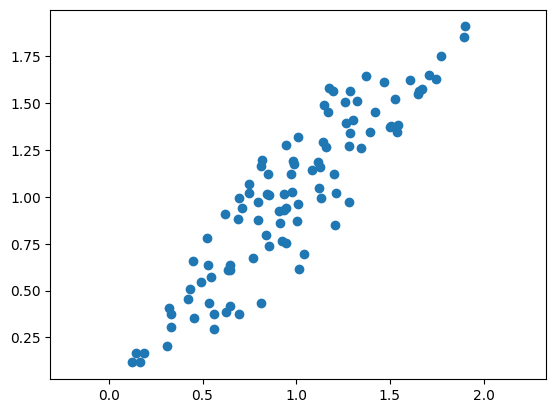

In [31]:
# Generate input data for x

D = 2  # ## Dimensionality of the input
x = torch.rand(100, D)
x[:, 0] = x[:, 0] + x[:, 1]
x[:, 1] = 0.5 * x[:, 0] + x[:, 1]

plt.scatter(x[:, 0], x[:, 1])
plt.axis('equal')
plt.show()


### Defining the encoder, decoder and loss function

### Weights and Biases

In [32]:
# Initialize weights and biases
wEncoder = torch.randn(D, 1, requires_grad=True)
wDecoder = torch.randn(1, D, requires_grad=True)
bEncoder = torch.randn(1, requires_grad=True)
bDecoder = torch.randn(1, D, requires_grad=True)


###  SGD optimizer and perform gradient descent

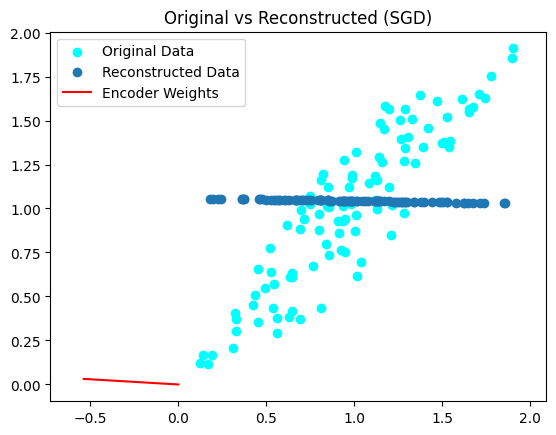

In [33]:
# Learning rate and optimizer (SGD without momentum)
learning_rate = 0.01
optimizer_sgd = torch.optim.SGD([wEncoder, wDecoder, bEncoder, bDecoder], lr=learning_rate)

# Train the autoencoder with SGD
epochs = 1000
losses_sgd = []

for epoch in range(epochs):
    optimizer_sgd.zero_grad()

    # Encoder step
    z = torch.matmul(x, wEncoder) + bEncoder

    # Decoder step
    x_recon = torch.matmul(z, wDecoder) + bDecoder

    # Compute the loss (MSE)
    loss = torch.mean((x - x_recon) ** 2)
    losses_sgd.append(loss.item())

    # Backpropagation
    loss.backward()
    optimizer_sgd.step()

# Plot the original data vs reconstructed data for SGD
plt.scatter(x[:, 0].detach(), x[:, 1].detach(), color='cyan', label='Original Data')
plt.scatter(x_recon[:, 0].detach(), x_recon[:, 1].detach(), label='Reconstructed Data')
plt.plot([0, wEncoder[0, 0].item()], [0, wEncoder[1, 0].item()], '-r', label='Encoder Weights')
plt.axis('equal')
plt.title('Original vs Reconstructed (SGD)')
plt.legend()
plt.show()


### Add momentum to SGD optimizer and retrain

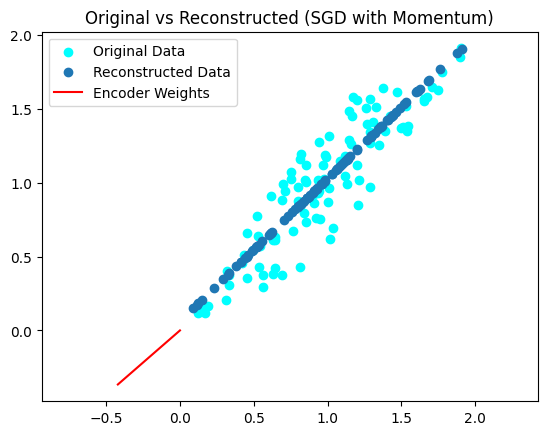

In [34]:
# SGD with momentum
optimizer_momentum = torch.optim.SGD([wEncoder, wDecoder, bEncoder, bDecoder], lr=learning_rate, momentum=0.9)

losses_momentum = []

for epoch in range(epochs):
    optimizer_momentum.zero_grad()

    # Encoder step
    z = torch.matmul(x, wEncoder) + bEncoder

    # Decoder step
    x_recon = torch.matmul(z, wDecoder) + bDecoder

    # Compute the loss (MSE)
    loss = torch.mean((x - x_recon) ** 2)
    losses_momentum.append(loss.item())

    # Backpropagation
    loss.backward()
    optimizer_momentum.step()

# Plot the original data vs reconstructed data for SGD with momentum
plt.scatter(x[:, 0].detach(), x[:, 1].detach(), color='cyan', label='Original Data')
plt.scatter(x_recon[:, 0].detach(), x_recon[:, 1].detach(), label='Reconstructed Data')
plt.plot([0, wEncoder[0, 0].item()], [0, wEncoder[1, 0].item()], '-r', label='Encoder Weights')
plt.axis('equal')
plt.title('Original vs Reconstructed (SGD with Momentum)')
plt.legend()
plt.show()

### RMSprop with momentum and retrain

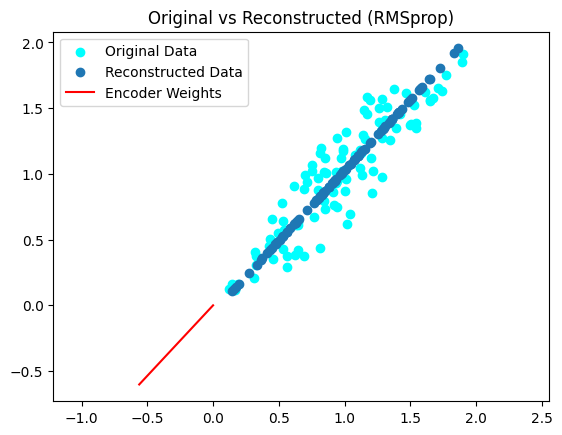

In [35]:
# RMSprop optimizer
optimizer_rmsprop = torch.optim.RMSprop([wEncoder, wDecoder, bEncoder, bDecoder], lr=learning_rate, momentum=0.9)

losses_rmsprop = []

for epoch in range(epochs):
    optimizer_rmsprop.zero_grad()

    # Encoder step
    z = torch.matmul(x, wEncoder) + bEncoder

    # Decoder step
    x_recon = torch.matmul(z, wDecoder) + bDecoder

    # Compute the loss (MSE)
    loss = torch.mean((x - x_recon) ** 2)
    losses_rmsprop.append(loss.item())

    # Backpropagation
    loss.backward()
    optimizer_rmsprop.step()

# Plot the original data vs reconstructed data for RMSprop
plt.scatter(x[:, 0].detach(), x[:, 1].detach(), color='cyan', label='Original Data')
plt.scatter(x_recon[:, 0].detach(), x_recon[:, 1].detach(), label='Reconstructed Data')
plt.plot([0, wEncoder[0, 0].item()], [0, wEncoder[1, 0].item()], '-r', label='Encoder Weights')
plt.axis('equal')
plt.title('Original vs Reconstructed (RMSprop)')
plt.legend()
plt.show()



### Plot the loss vs epochs

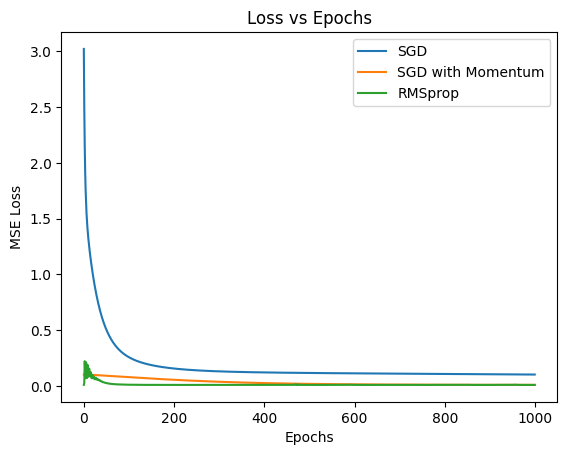

In [36]:
plt.plot(losses_sgd, label='SGD')
plt.plot(losses_momentum, label='SGD with Momentum')
plt.plot(losses_rmsprop, label='RMSprop')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


In [37]:
# Print out weight ratios
print(f"SGD: Encoder/Decoder weight ratio (dim 0): {wEncoder[0, 0].item() / wDecoder[0, 0].item()}")
print(f"SGD: Encoder/Decoder weight ratio (dim 1): {wEncoder[1, 0].item() / wDecoder[0, 1].item()}")

SGD: Encoder/Decoder weight ratio (dim 0): 0.6798630428895572
SGD: Encoder/Decoder weight ratio (dim 1): 0.6798871378966004


## Interpretation of Results:

### Observation and Learning

Through the three experiments—using SGD, SGD with momentum, and RMSprop, it can be observed that all three optimizers are good at reconstructing the original data through the linear autoencoder. However, there are differences in convergence behavior.

**SGD (Stochastic Gradient Descent):**
This optimizer took longer to converge and the loss decreased more slowly across the epochs. It did eventually learn a decent reconstruction, but the path to minimizing the loss was not as smooth compared to the other optimizers. 

**SGD with momentum:**
By adding momentum, the optimizer was able to converge faster compared to standard SGD. This is because momentum helps the optimizer maintain direction during updates and avoid oscillations. It speeds up the process. The reconstructed data was closer to the original, and the loss decreased more rapidly.

**RMSprop:** 
RMSprop adjusts the learning rate dynamically, allowing it to handle different magnitudes of gradients better. In this case, the loss decreased even more smoothly, and it converged quicker than both the other optimizers. The adaptive nature of RMSprop helps the optimizer avoid getting stuck in small or noisy gradient areas, allowing it to traverse the error surface efficiently.

**Key Learnings:**
Momentum in SGD accelerates the learning process by helping the optimizer converge more quickly.
RMSprop's adaptive learning rate allows it to handle complex gradients more efficiently, leading to faster convergence and smoother training.


### Additional For AIML421:

**1. Relationship Between Autoencoder and PCA:**

An autoencoder and Principal Component Analysis (PCA) are both dimensionality reduction techniques. 
PCA reduces dimensionality by projecting data onto orthogonal principal components that capture the maximum variance. 
This assumes that there is a linear relationship between features.
A linear autoencoder works by compressing data into a lower-dimensional space like a bottleneck and reconstructing it.

Te differences between the models is that PCA is strictly linear and orthogonal while the autoencoders can 
capture more complex patterns even when extended to non-linear cases, though in the case of a linear autoencoder, 
the dimensionality reduction behaves similar to the PCA.


**2. Why RMSprop and Adam Optimizers Prefer Diagonal Directions:**

RMSprop and Adam optimizers use adaptive learning rates that scale based on the history of squared gradients. 
This scaling means that in dimensions where gradients are large, the learning rate is reduced and in dimensions where gradients are smaller, 
the learning rate is increased.

As a result, the optimizers tend to move along directions where the gradients are relatively balanced across dimensions, which often corresponds to diagonal paths in the parameter space. This behavior helps avoid oscillations or getting stuck in directions with high gradient variance and leads to more efficient traversal of the error surface, 
particularly in complex problems with varying gradients across different dimensions.

### References:

Medium.com: https://medium.com/game-of-bits/understanding-optimizers-for-training-deep-learning-models-694c071b5b70
Kingma, D. P., & Ba, J. (2014). Adam: A method for stochastic optimization. arXiv preprint arXiv:1412.6980. https://doi.org/10.48550/arXiv.1412.6980 
